# 들어가며

최근 딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 의료 분야를 들 수 있다. 영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있다.

하지만, 의료 영상 분석은 일반 이미지 처리와는 다른 독특한 특징을 가지고 있다.

- 의료 영상 이미지는 개인 정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않습니다.
- 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비쌉니다.
- 희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 드문 일입니다.
- 음성/양성 데이터 간 imbalance가 심합니다. 학습에 주의가 필요합니다.
- 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있습니다.

따라서 의료 영상 처리를 위해서는 딥러닝 영상처리 기술뿐 아니라, 의료 도메인 지식 및 의료 영상에 대한 명확한 이해가 필요하다.

이번 시간엔 의료 영상 기초 상식에 대해 알아보고, 실제로 의료 영상 데이터를 처리하는 실습을 해보자.

데이터는 여기서 준비한다.

[Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

```
$ mkdir -p ~/aiffel/chest_xray
$ ln -s ~/data/ ~/aiffel/chest_xray
```

# X-RAY 이미지

이번 시간엔 X-RAY 이미지를 기반으로 하는 폐렴 진단 딥러닝 모델을 제작하자. 먼저, X-RAY 영상을 촬영하기 위해 사용되는 자세 분류체계를 이해해야 한다.

## 1) 의료영상 자세 분류

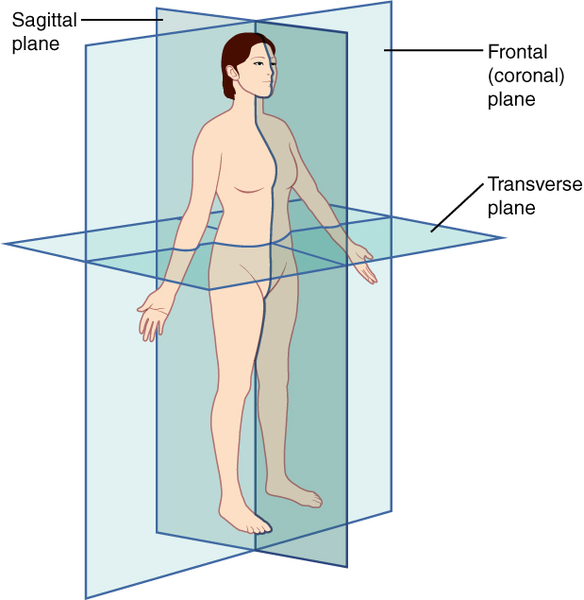

https://ko.wikipedia.org/wiki/%ED%95%B4%EB%B6%80%ED%95%99_%EC%9A%A9%EC%96%B4

위의 이미지에 따르면 의료 영상 촬영은 인체를 세 방향의 단면으로 나누어 진행된다.

- Sagittal plane : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면.

- Coronal plane : 관상면. 인체를 앞뒤로 나누는 면.

- Transverse plane : 횡단면(수평면). 인체를 상하로 나누는 면.

예시 사진을 보자.

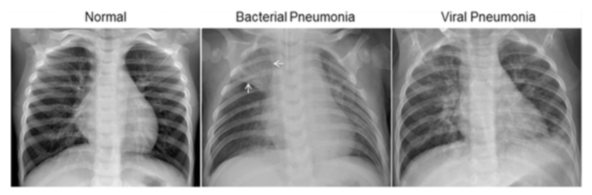

이와 같이 오늘 사용할 데이터는 모두 Coronal Plane 이미지로 되어있다.

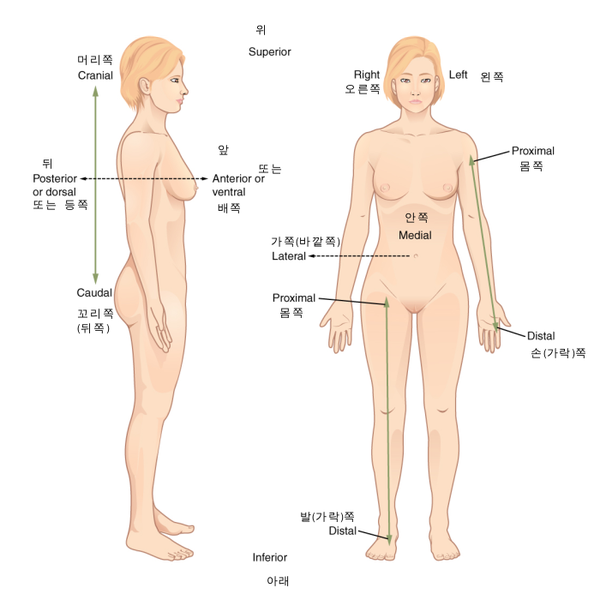

https://ko.wikipedia.org/wiki/%ED%95%B4%EB%B6%80%ED%95%99_%EC%9A%A9%EC%96%B4

영상을 볼 떄의 해부학적 위치에 대해 알아보자. 우리가 영상을 보게 되면 위의 이미지와 같이 보게 된다. 가장 많이들 헷갈려하는 게 오른쪽/왼쪽이다.

이제 X-RAY에 대해 배워보자.

## 2) X-RAY 특성

X-RAY는 전자기파가 몸을 통과한 결과를 이미지화 시킨 것이다. 즉, 통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 나오게 된다.

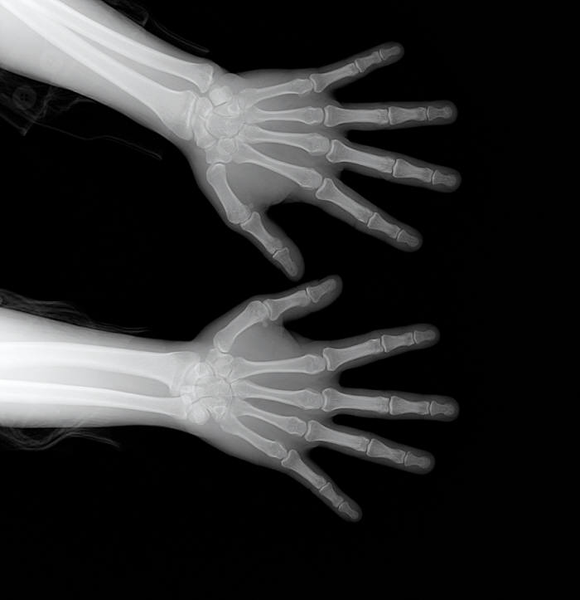

http://m.etnews.com/20181102000172?obj=Tzo4OiJzdGRDbGFzcyI6Mjp7czo3OiJyZWZlcmVyIjtOO3M6NzoiZm9yd2FyZCI7czoxMzoid2ViIHRvIG1vYmlsZSI7fQ%3D%3D

손 영상이다.

- 뼈 : 하얀색
- 근육 및 지방 : 연한 회색
- 공기 : 검은색

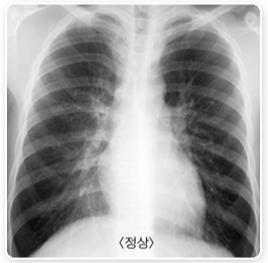

http://health.cdc.go.kr/health/Resource/Module/Content/Printok.do?idx=2110&subIdx=4

흉부 영상이다.

- 갈비뼈 : 하얀색
- 폐 : 검은색
- 어깨 쪽의 지방 및 근육 : 연한 회색

폐는 공기가 많이 차 있어서 검은색이 나오게 된다.

# 폐렴을 진단해보자(1)

의료 인공지능은 질병의 정확한 분류, 환자의 중증도를 확인하는 용도 등 다양하게 사용된다. 이 중 가장 핫한 분야는 질병을 탐지해내는 인공지능이다. 폐렴 딥러닝 모델을 만들어보자.

## 데이터셋

이번 노드에서 사용할 데이터는 캐글의 `Chest X-Ray Images`이다.

데이터 구성은 train, test, val로 구성되며, 각 이미지 카테고리(폐렴, 정상)에 대한 하위 폴더를 포함한다. 5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상)가 있다. 전체 데이터의 크기는 총 1.2GB 가량 된다.

해당 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X선 영상이다.


## 폐렴이란?

> 폐렴(pneumonia 뉴모니아)은 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다. 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인이 될 수가 있다. 드물게는 알레르기 반응이나 자극적인 화학 물질을 흡입해 발생하기도 한다. 노인이나 어린아이, 혹은 전체적으로 상태가 안 좋은 환자들이나 기침 반사가 약한 사람들에게는 흡인성 폐렴이 발생한다. 그리고 세균이 원인인 경우는 항생제로 치료를 할 수 있다. 항생제가 생기기 전에는 50~90%가 사망할 정도로 위험한 질환이었으나, 현재는 거의 사망하지 않는다. 1940년대에 항생제가 개발되기 전까지는 폐렴 환자의 1/3 정도가 사망하였다. 오늘날에는 적절한 의학적 치료로 폐렴 환자의 95% 이상이 회복된다. 그러나 일부 저개발국(개발 도상국)에서는 폐렴이 여전히 주요 사망 원인 중 하나이다.   
>출처 : https://ko.wikipedia.org/wiki/폐렴

> 염증은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호반응이다. 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처 부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다.   
> 출처 : https://ko.wikipedia.org/wiki/염증

폐렴이 걸렸을 떄 X-RAY상에서 어떻게 나오는지 보자.

## 폐렴 구별법

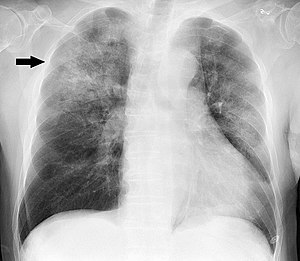

폐렴의 구별법은 언뜻 예상외로 간단하다.
X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰된다.
구별 방법은 간단하지만 실제로 영상을 보면 희미한 경우가 많이 있어 저게 실제로 폐렴으로 인한 것인지 아니면 다른 이유 때문인지 파악하기 어렵다.

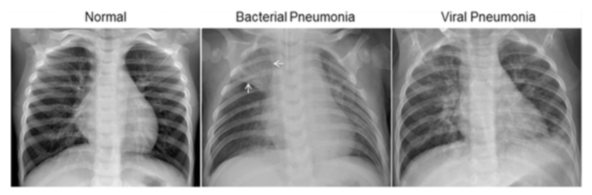

정상적인 흉부 X-RAY(왼쪽)는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여준다. 세균성 폐렴 (가운데)은 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 있는 나타내는 반면, 바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산된 "interstitial(조직 사이에 있는)" 패턴으로 나타난다.

(참고) 아래 제공되는 실습코드는 이 [캐글 노트북](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays)을 기반으로 작성된 것임을 밝힙니다.

## 1) Set-up
library import

In [2]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
# 필요한 변수들을 생성한다.

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/aiffel/aiffel


## 2) 데이터 가져오기

데이터를 열어보면 이미 train, val(validation), test 로 나누어져 있다. 각 데이터의 개수를 세 보자.


In [4]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


In [5]:
# val 수가 너무 적기 때문에, train:val을 8:2로 재조정

# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


In [7]:
# train data 내에 정상 이미지 수/ 폐렴 이미지 수 check
## 파일 경로에 "normal","pneumonia"가 있는지 확인하면 폐렴이미지도 셀 수 있다

COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1072
Pneumonia images count in training set: 3113


우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을수록 training을 잘 한다. imbalance한 것은 차후에 조정하자. test와 val 데이터셋은 평가를 위해 사용되기 때문에 학습과 관련이 없다. 따라서 imbalance 하더라도 문제가 없다.

이제 tf.data 인서튼서를 만들어보자. tf.data는 tensorflow에서 학습시킬 때, mini-batch로 작업할 수 있도록 해준다.

[mini-batch는 왜 사용하는가?](https://acdongpgm.tistory.com/202)

In [8]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [10]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


현재 이미지에는 라벨 데이터가 없다. 따라서, 파일 경로를 참고하여 라벨 데이터를 만들어주자.

In [12]:
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)|

이미지 데이터는 사이즈가 제각각일 가능성이 높다. 이미지의 사이즈를 통일시키고 GPU 메모리를 효율적으로 사용하기 위해 이미지 사이즈를 줄이자. 

decode_img, process_path 함수를 만들자.

process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고 사이즈를 변경한다. 이후 get_label을 이용해서 라벨 값을 가져온다.

In [13]:
# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

train dataset, val dataset을 만든다. num_parallel_calls parameter에 위에서 할당한 AUTOTUNE변수를 이용하면 데이터를 더욱 빠르게 처리할 수 있다.

In [14]:
# make train, validation dataset

train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [16]:
# check about image resize, labeling

for image, label in train_ds.take(1): # train_ds.take(1)은 하나의 데이터만 가져온다는 의미다.
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


In [17]:
# make test dataset

test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


Tensorflow에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해준다. tf.data 파이프라인을 이용하여 prepare_for_training() 함수를 정의해서 데이터를 변환시켜주자.

- shuffle()을 사용해 고정 크기 버퍼를 유지하고, 해당 버터에서 무작위로 균일하게 다음 요소를 선택한다.

- repeat()을 사용하면 epoch을 진행하면서 여러 번 데이터셋을 불러오게 되는데, 이때 repeat()을 사용한 테이터셋의 경우 여러번 데이터셋을 활용할 수 있게 해준다.

- batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 배치로 주어진다.

- prefetch()를 사용하면 학습데이터를 나눠서 읽어오게 해준다. 따라서 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있다.

In [18]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

## 3) 데이터 시각화

데이터를 보기 위해 먼저, train에 있는 batch 중 첫 번째 배치를 추출한다. 추출된 배치를 image와 label 데이터셋으로 나눈다. 추출된 배치를 image와 label dataset으로 나눈다. 이후 show_batch() 함수를 이용해 결과 사진을 보자.

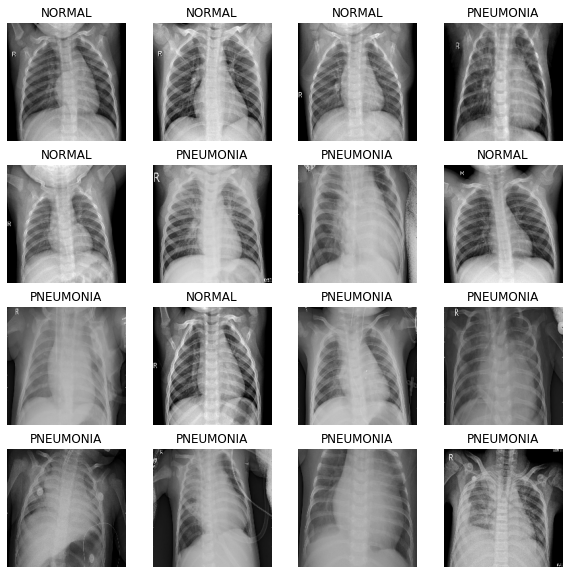

In [19]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

## 4) CNN 모델링

[CNN 요약](http://taewan.kim/post/cnn/)

CNN을 통해 모델링을 하고 결과를 보자.

먼저, Convolution block을 만들어야 한다. conv_block()의 구성은 Convolution을 두 번 진행하고 Batch Normalization을 통해서 Gradient Vanishing, Gradient Exploding을 해결한다. 이후 Max Pooling을 진행한다.

In [23]:
# making conv_block
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

In [22]:
# making Dense Block
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

방금 만든 모델에는 **BatchNormalization과 Dropout**이라는 두 가지 regularization 기법이 동시에 사용되고 있다. 하지만 일반적으로는 이런 방법은 잘 사용하지 않는다. 대표적인 게 아래 논문의 사례이다.

[Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift](https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf)

위 논문에서는 variance shift를 억제하는 Batch Normalization과 이를 유발하는 Dropout을 동시에 사용하는 것이 어울리지 않는다고 밝혔다.

하지만, 실용적으론는 두 방법을 동시에 사용하는 것이 낫다고 보는 견해도 있다. 그 이유는 동시에 사용하는 것이 성능 향상에 예외적으로 도움을 주는 경우도 있기 때문이다.

[Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks](https://arxiv.org/pdf/1905.05928.pdf)

In [24]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

## 5) data imbalance 처리

imbalance를 해결하기 위해 `Weight balancing`이라는 테크닉이 사용된다. 이는 training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법이다. Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight에 이러한 클래스별 가중치를 세팅할 수 있도록 지원하고 있다. 

[참고: 딥러닝에서 클래스 불균형을 다루는 방법](https://3months.tistory.com/414)

아래 코드에서 `weight_for_0`은 Normal image에 사용할 weight를, `weight_for_1`은 Pneumonia image에 사용할 weight를 세팅한다. 이 weight들은 Normal과 Pneumonia 전체 데이터 건수에 반비례하도록 설정된다.

In [25]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.95
Weight for PNEUMONIA: 0.67


## 6) 모델 훈련

먼저 GPU를 선택한다. 모델은 위에서 만들었던 모델 함수인 `build_model()`을 model에 선언한다.

- loss: binary_crossentropy
- optimizer: adam
- metrics: accuracy, precision, recall

In [26]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )


In [27]:
# 모델을 fit하자.각 파라미터에 위에서 선언했던 변수, 데이터셋을 가져와서 각각에 맞게 넣어주자

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        
    )

Epoch 1/25
261/261 [==============================] - 86s 193ms/step - loss: 0.4201 - accuracy: 0.7974 - precision: 0.9460 - recall: 0.7718 - val_loss: 0.8511 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 49s 188ms/step - loss: 0.2528 - accuracy: 0.9040 - precision: 0.9685 - recall: 0.9002 - val_loss: 1.6538 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 49s 190ms/step - loss: 0.2057 - accuracy: 0.9205 - precision: 0.9737 - recall: 0.9178 - val_loss: 0.1585 - val_accuracy: 0.9308 - val_precision: 0.9189 - val_recall: 0.9935
Epoch 4/25
261/261 [==============================] - 50s 191ms/step - loss: 0.1844 - accuracy: 0.9286 - precision: 0.9753 - recall: 0.9276 - val_loss: 0.0897 - val_accuracy: 0.9712 - val_precision: 0.9855 - val_recall: 0.9752
Epoch 5/25
261/261 [==============================] - 51s 196ms/step - loss: 0.1950 - accura

안 돌려봤는데 추후 참고용

✔ check: monitor에 여러 값을 넣는 방법은?

```python
# Earlystopping추가해보기
es = EarlyStopping(monitor=['precision','recall'], patience=2, verbose=1)


with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[es]
    )
```

## 7. 결과 확인

그래프로 Epoch마다 모델의 precision, recall, accuracy, loss의 변화를 살펴보자.

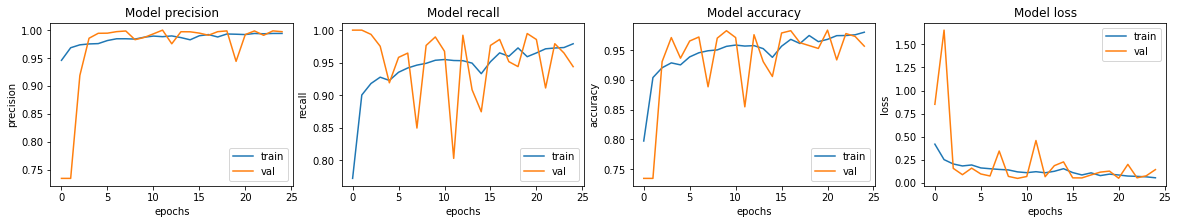

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [29]:
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 4s 108ms/step - loss: 0.5997 - accuracy: 0.8878 - precision: 0.8636 - recall: 0.9744
Loss: 0.5997446775436401,
Accuracy: 0.8878205418586731,
Precision: 0.8636363744735718,
Recall: 0.9743589758872986


좀 더 성능을 개선할 방법은 없을까?? 오늘 다룬 폐렴 데이터를 기반으로 한 연구도 많이 찾아볼 수 있다.

의료 데이터의 경우 구하기가 어렵고, 구하더라도 데이터가 작은 경우가 많이 있다. 이런 문제를 해결하기 위해서는 `Data Augmentation` 방법을 많이 시도한다.

Data Augmentation은 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많을 때 사용한다. 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용한다. 이미지 회전, 가우시안 노이즈 추가 방법 등을 사용한다. 특히 장기의 크기는 사람마다 바뀌지 않기 때문에, 노이즈 추가 방법을 통해 이런 특성을 활용한다.

전통적인 Data augmentation 외에도 GAN을 이요해서 Data augmentation을 시도하는 연구도 있으니 참고해보자.

# 프로젝트

## Step 1. 실험환경 Set-up
거의 바꿔볼 수 있을 게 없을 것 같지만, Batch size, Epoch 등을 변경해볼 수 있을 것입니다.

In [3]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
# 필요한 변수들을 생성한다.

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 30

print(ROOT_PATH)

/aiffel/aiffel


## Step 2. 데이터 준비하기
원본 데이터를 가져와서 전처리 및 배치 구성을 진행합니다.
의료 영상 이미지의 특성상 데이터는 언제나 충분하지 않습니다. 이를 극복할 수 있는 방법을 고민해 봅시다.

이전 실습에서 고려하지 않았던 augmentation 기법을 고려해 볼 수 있을 것입니다. 그러나 의료 영상인 경우, 일반적인 이미지 처리에서 사용하는 augmentation들이 항상 도움이 된다고 말할 수 없습니다. 특히 X-RAY 같은 의료 영상의 특성상, 육안으로도 구분하기 어려운 미묘한 차이에 더해진 노이즈 등 부수효과가 오히려 방해를 줄 수도 있기 때문입니다.
그래서 augmentation 도입은 신중해야 합니다.

만약 예를 들어 좌우 반전 정도의 augmentation만 도입한다고 한다면 다음과 같이 진행될 것입니다.



In [5]:
# file 가져오기
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


In [6]:
# val 수가 너무 적기 때문에, train:val을 8:2로 재조정

# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(1)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


In [7]:
# train data 내에 정상 이미지 수/ 폐렴 이미지 수 check
## 파일 경로에 "normal","pneumonia"가 있는지 확인하면 폐렴이미지도 셀 수 있다

COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1083
Pneumonia images count in training set: 3102


In [8]:
# mini-batch 사용하기

train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [9]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [10]:
# 라벨 데이터 생성
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

In [11]:
# decode_img, process_path 함수 생성

# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

In [12]:
# make train, validation dataset
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [13]:
# check about image resize, labeling

for image, label in train_ds.take(1): # train_ds.take(1)은 하나의 데이터만 가져온다는 의미다.
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


In [14]:
# data augmentation

def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가되었습니다.
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [15]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

In [16]:
# check about image resize, labeling

for image, label in train_ds.take(1): # train_ds.take(1)은 하나의 데이터만 가져온다는 의미다.
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (16, 180, 180, 3)
Label:  [ True False  True  True  True False  True  True  True  True  True  True
 False  True  True  True]


In [17]:
# make test dataset

test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


## Step 3. 데이터 시각화
학습용 데이터를 시각화해서 확인해 봅니다.
만약 augmentation을 시도했다면 이후 실습 코드에 있는 show_batch() 함수를 통해 실제로 좌우 반전 등이 제대로 처리되었는지 확인해 봅시다.

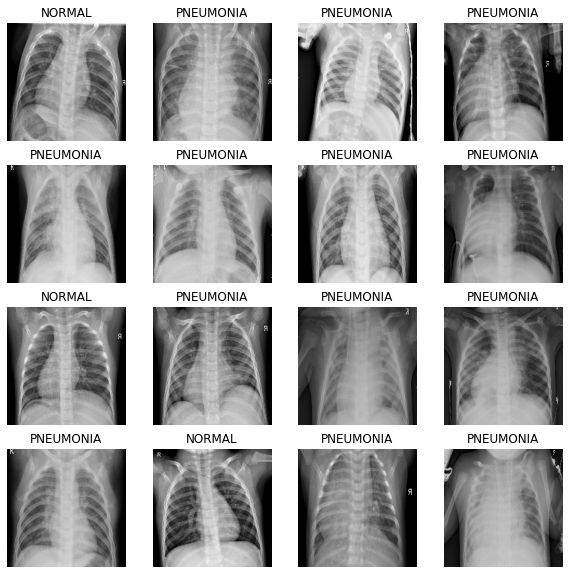

In [18]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())


## Step 4. CNN 모델링
의료 영상 판독을 위해 실습에서 구현했던 model에서 다양한 것들을 바꾸어 가며 실험해볼 수 있습니다. Convolution filter, 채널 개수, activation, 모델 구조 등을 다양하게 바꾸어볼 수 있습니다.

그리고, 우리는 BatchNormalization과 Dropout을 한 모델 안에서 동시에 사용하는 특이한 구성을 실습했습니다.
이것은 일반적으로 잘 사용되는 형태는 아닙니다. 하지만 이미지 사이즈가 크고 데이터가 부족한 의료 영상에서는 실용적으로 간혹 좋은 성능을 보이기도 합니다. 만약 이 구성을 변경해 보면 어떤 효과가 발생하는지도 실험해 봅시다. BatchNormalization을 쓰거나 혹은 쓰지 않거나, Dropout을 쓰거나 혹은 쓰지 않거나 할 수 있습니다. 또, Dropout 비율을 변경해볼 수도 있습니다.

In [41]:
# making conv_block
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

# making conv_block without batch normalization
def conv_block_nobatch(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

In [42]:
# making Dense Block
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

# making Dense Block without batchnormalization
def dense_block_nobatch(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block


In [61]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

def build_model_nobatch():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block_nobatch(32),
        conv_block_nobatch(64),
        
        conv_block_nobatch(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block_nobatch(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block_nobatch(512, 0.7),
        dense_block_nobatch(128, 0.5),
        dense_block_nobatch(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

def build_model_nodrop():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        
        conv_block(256),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0),
        dense_block(128, 0),
        dense_block(64, 0),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

## Step 5. 데이터 imbalance 처리
실습 코드에서 데이터의 imbalance 문제에 대처하기 위해 데이터 비율로 나누어진 class_weight를 설정해 주었습니다. 만약 이러한 처리를 생략한다면 어떻게 될까요? 또 recall을 강조하기 위해 폐렴 데이터를 잘 맞추는 것을 더 강화하는 효과를 만들어낼 수는 없을까요?



In [22]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.93
Weight for PNEUMONIA: 0.67


## Step 6. 모델 훈련 & 결과확인과 시각화
loss 함수를 변경하기는 어렵겠지만, optimizer나 learning rate 등의 변화를 고려해 볼 수 있을 것입니다.

테스트 데이터로 훈련된 모델을 평가해 봅시다. 우선은 accuracy를 고려해야겠지만 의료 영상 모델의 특성상 recall도 중요합니다. 훈련과정의 history 그래프를 시각화해 보고, 학습 진행 양상을 면밀히 분석해 보는 것도 잊지 않도록 합시다.

In [32]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [38]:
# Earlystopping추가해보기
checkpoint_filepath = os.path.join(os.getenv('HOME'), 'aiffel') + '/mc_test'

es = EarlyStopping(monitor='val_loss', mode='min', patience=9, verbose=1)
#mc = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='min', save_freq=5)

EPOCHS = 25

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[es]
       
    )

Epoch 1/25
261/261 [==============================] - 59s 191ms/step - loss: 0.0609 - accuracy: 0.9775 - precision: 0.9947 - recall: 0.9748 - val_loss: 0.0724 - val_accuracy: 0.9702 - val_precision: 0.9934 - val_recall: 0.9665
Epoch 2/25
261/261 [==============================] - 49s 187ms/step - loss: 0.0547 - accuracy: 0.9804 - precision: 0.9951 - recall: 0.9784 - val_loss: 0.2881 - val_accuracy: 0.9202 - val_precision: 0.9971 - val_recall: 0.8955
Epoch 3/25
261/261 [==============================] - 49s 187ms/step - loss: 0.0590 - accuracy: 0.9782 - precision: 0.9947 - recall: 0.9758 - val_loss: 0.0547 - val_accuracy: 0.9827 - val_precision: 0.9846 - val_recall: 0.9922
Epoch 4/25
261/261 [==============================] - 49s 190ms/step - loss: 0.0665 - accuracy: 0.9768 - precision: 0.9934 - recall: 0.9752 - val_loss: 0.0681 - val_accuracy: 0.9740 - val_precision: 0.9960 - val_recall: 0.9691
Epoch 5/25
261/261 [==============================] - 50s 192ms/step - loss: 0.1199 - accura

39/39 [==============================] - 4s 100ms/step - loss: 1.0507 - accuracy: 0.8221 - precision: 0.7841 - recall: 0.9872
Loss: 1.0506775379180908,
Accuracy: 0.8221153616905212,
Precision: 0.7841140627861023,
Recall: 0.9871794581413269


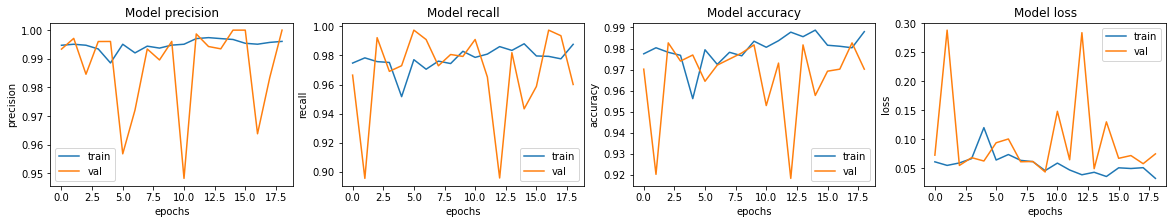

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')    

In [33]:
EPOCHS = 30

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
       
    )


Epoch 1/30
261/261 [==============================] - 66s 221ms/step - loss: 0.3792 - accuracy: 0.8278 - precision: 0.9559 - recall: 0.8048 - val_loss: 0.6110 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 2/30
261/261 [==============================] - 48s 184ms/step - loss: 0.2374 - accuracy: 0.9030 - precision: 0.9726 - recall: 0.8944 - val_loss: 1.1136 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 3/30
261/261 [==============================] - 48s 184ms/step - loss: 0.1977 - accuracy: 0.9250 - precision: 0.9747 - recall: 0.9227 - val_loss: 0.3871 - val_accuracy: 0.8115 - val_precision: 0.7984 - val_recall: 1.0000
Epoch 4/30
261/261 [==============================] - 48s 184ms/step - loss: 0.1880 - accuracy: 0.9250 - precision: 0.9764 - recall: 0.9211 - val_loss: 0.1480 - val_accuracy: 0.9394 - val_precision: 0.9529 - val_recall: 0.9665
Epoch 5/30
261/261 [==============================] - 49s 186ms/step - loss: 0.1703 - accura

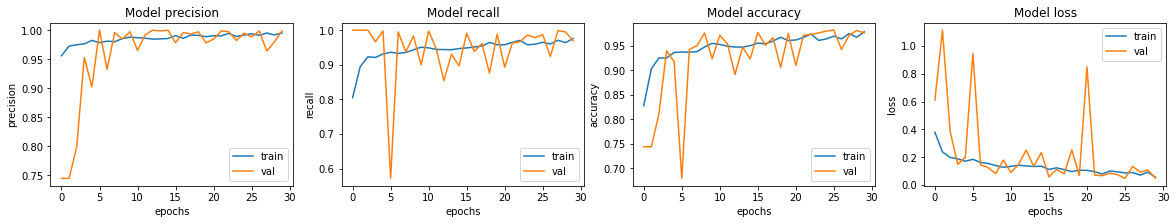

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [35]:
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 4s 112ms/step - loss: 0.8790 - accuracy: 0.8077 - precision: 0.7700 - recall: 0.9872
Loss: 0.878973126411438,
Accuracy: 0.807692289352417,
Precision: 0.7699999809265137,
Recall: 0.9871794581413269


In [52]:
# Earlystopping 제거

EPOCHS = 26

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,

    )

Epoch 1/26
261/261 [==============================] - 55s 183ms/step - loss: 0.6937 - accuracy: 0.3987 - precision: 0.7386 - recall: 0.2921 - val_loss: 0.6795 - val_accuracy: 0.7490 - val_precision: 0.7490 - val_recall: 1.0000
Epoch 2/26
261/261 [==============================] - 48s 186ms/step - loss: 0.6937 - accuracy: 0.6161 - precision: 0.7378 - recall: 0.7481 - val_loss: 0.6994 - val_accuracy: 0.2538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/26
261/261 [==============================] - 48s 183ms/step - loss: 0.6924 - accuracy: 0.4315 - precision: 0.7347 - recall: 0.3677 - val_loss: 0.6842 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 4/26
261/261 [==============================] - 49s 187ms/step - loss: 0.6964 - accuracy: 0.4516 - precision: 0.7342 - recall: 0.4032 - val_loss: 0.6985 - val_accuracy: 0.2548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/26
261/261 [==============================] - 49s 187ms/step - loss:

39/39 [==============================] - 4s 102ms/step - loss: 0.6940 - accuracy: 0.3750 - precision: 0.0000e+00 - recall: 0.0000e+00
Loss: 0.694023072719574,
Accuracy: 0.375,
Precision: 0.0,
Recall: 0.0


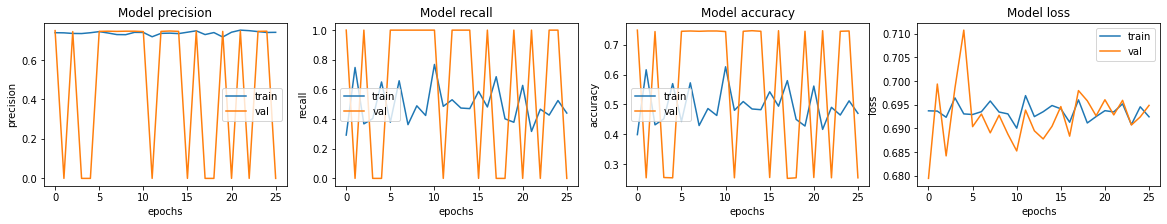

In [53]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')    

###  [Dropout , Batchnormalization] 여부에 따른 결과 비교

#### 1. dropout, batch normalization 모두

In [69]:
EPOCHS = 2

with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
       
    )

    


Epoch 1/2
261/261 [==============================] - 59s 190ms/step - loss: 0.3911 - accuracy: 0.8022 - precision: 0.9483 - recall: 0.7756 - val_loss: 0.6502 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 2/2
261/261 [==============================] - 49s 189ms/step - loss: 0.2545 - accuracy: 0.9030 - precision: 0.9680 - recall: 0.8988 - val_loss: 1.2627 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000


39/39 [==============================] - 4s 110ms/step - loss: 1.8801 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Loss: 1.8801424503326416,
Accuracy: 0.625,
Precision: 0.625,
Recall: 1.0


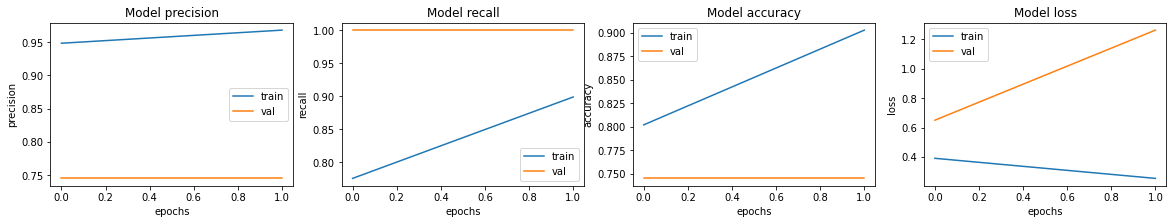

In [70]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')        

#### 2. batch normalization만


In [71]:
with tf.device('/GPU:0'):
    model = build_model_nodrop()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )
    
    
EPOCHS = 2

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[es]
       
    )    


Epoch 1/2
261/261 [==============================] - 57s 187ms/step - loss: 0.2456 - accuracy: 0.9030 - precision: 0.9732 - recall: 0.8937 - val_loss: 0.6249 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 2/2
261/261 [==============================] - 49s 190ms/step - loss: 0.1943 - accuracy: 0.9253 - precision: 0.9784 - recall: 0.9196 - val_loss: 1.1626 - val_accuracy: 0.7462 - val_precision: 0.7462 - val_recall: 1.0000


39/39 [==============================] - 4s 104ms/step - loss: 1.7334 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Loss: 1.7333968877792358,
Accuracy: 0.625,
Precision: 0.625,
Recall: 1.0


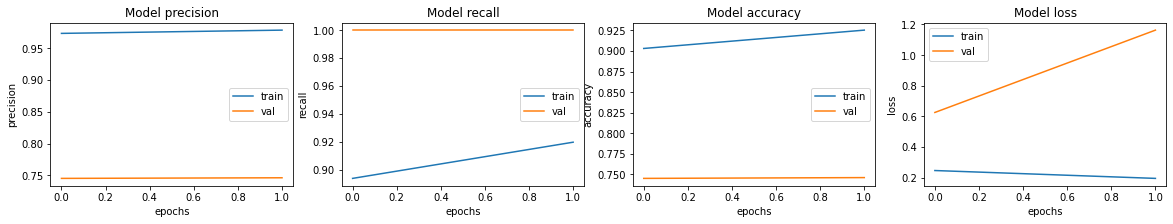

In [72]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')        

#### 3. dropout 만

In [73]:
with tf.device('/GPU:0'):
    model = build_model_nobatch()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

EPOCHS = 2

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[es]
       
    )    
        
    


Epoch 1/2
261/261 [==============================] - 57s 185ms/step - loss: 0.6939 - accuracy: 0.5318 - precision: 0.7474 - recall: 0.5564 - val_loss: 0.6814 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 2/2
261/261 [==============================] - 48s 185ms/step - loss: 0.6945 - accuracy: 0.4370 - precision: 0.7241 - recall: 0.3884 - val_loss: 0.6864 - val_accuracy: 0.7481 - val_precision: 0.7481 - val_recall: 1.0000


39/39 [==============================] - 4s 106ms/step - loss: 0.6898 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Loss: 0.6898078918457031,
Accuracy: 0.625,
Precision: 0.625,
Recall: 1.0


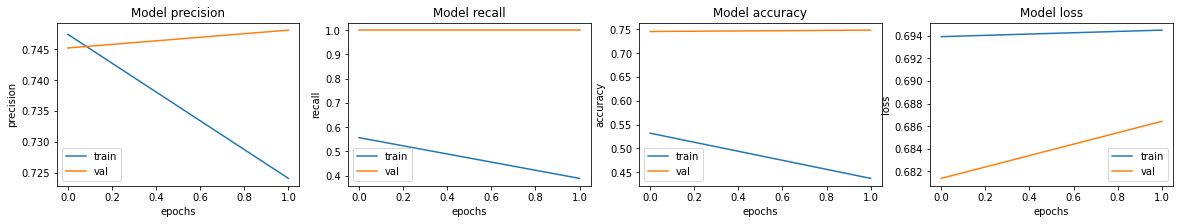

In [74]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')        

### 85% 이상의 정확도를 찾기

일단은 dropout만 적용했을 때 loss가 적게 나왔음을 확인하였다. 그래서 제일 처음엔 batch normalization 제외해서 학습을 시켜보자!

In [76]:
with tf.device('/GPU:0'):
    model = build_model_nobatch()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

# Earlystopping추가해보기

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

EPOCHS = 25

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[es]
       
    )
    


Epoch 1/25
261/261 [==============================] - 59s 191ms/step - loss: 0.6943 - accuracy: 0.4545 - precision: 0.7327 - recall: 0.4160 - val_loss: 0.7009 - val_accuracy: 0.2538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
261/261 [==============================] - 49s 188ms/step - loss: 0.6935 - accuracy: 0.4629 - precision: 0.7358 - recall: 0.4299 - val_loss: 0.6871 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 49s 188ms/step - loss: 0.6930 - accuracy: 0.5275 - precision: 0.7419 - recall: 0.5568 - val_loss: 0.6899 - val_accuracy: 0.7471 - val_precision: 0.7471 - val_recall: 1.0000
Epoch 4/25
261/261 [==============================] - 49s 190ms/step - loss: 0.6959 - accuracy: 0.4875 - precision: 0.7348 - recall: 0.4801 - val_loss: 0.6950 - val_accuracy: 0.2538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
261/261 [==============================] - 50s 193ms/step - loss:

39/39 [==============================] - 5s 116ms/step - loss: 0.6947 - accuracy: 0.3750 - precision: 0.0000e+00 - recall: 0.0000e+00
Loss: 0.6946602463722229,
Accuracy: 0.375,
Precision: 0.0,
Recall: 0.0


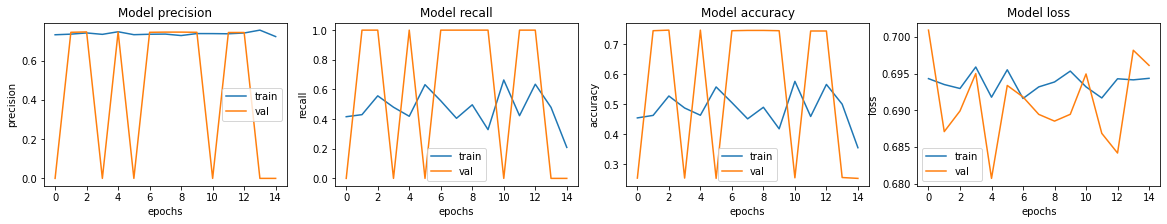

In [77]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')        

data augmentation 없이 학습을 다시 시켜보자.

In [88]:
# 필요한 변수들을 생성한다.

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 25

In [89]:

# file 가져오기
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


In [90]:

# val 수가 너무 적기 때문에, train:val을 8:2로 재조정

# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(1)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))


4185
1047


In [91]:
# train data 내에 정상 이미지 수/ 폐렴 이미지 수 check
## 파일 경로에 "normal","pneumonia"가 있는지 확인하면 폐렴이미지도 셀 수 있다

COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1082
Pneumonia images count in training set: 3103


In [92]:
# mini-batch 사용하기

train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

# make train, validation dataset
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)


In [93]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [97]:
# make test dataset

test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


In [98]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

In [99]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))



Weight for NORMAL: 1.93
Weight for PNEUMONIA: 0.67


In [100]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [101]:
# 모델을 fit하자.각 파라미터에 위에서 선언했던 변수, 데이터셋을 가져와서 각각에 맞게 넣어주자
EPOCHS = 25

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        
    )

Epoch 1/25
261/261 [==============================] - 59s 192ms/step - loss: 0.3970 - accuracy: 0.7948 - precision: 0.9512 - recall: 0.7622 - val_loss: 0.6723 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 48s 185ms/step - loss: 0.2249 - accuracy: 0.9138 - precision: 0.9783 - recall: 0.9038 - val_loss: 1.1364 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 48s 183ms/step - loss: 0.1926 - accuracy: 0.9341 - precision: 0.9783 - recall: 0.9318 - val_loss: 0.1305 - val_accuracy: 0.9500 - val_precision: 0.9402 - val_recall: 0.9961
Epoch 4/25
261/261 [==============================] - 50s 192ms/step - loss: 0.1938 - accuracy: 0.9289 - precision: 0.9755 - recall: 0.9273 - val_loss: 0.0870 - val_accuracy: 0.9673 - val_precision: 0.9696 - val_recall: 0.9871
Epoch 5/25
261/261 [==============================] - 51s 195ms/step - loss: 0.1595 - accura

39/39 [==============================] - 4s 104ms/step - loss: 0.7209 - accuracy: 0.8253 - precision: 0.7921 - recall: 0.9769
Loss: 0.7208653092384338,
Accuracy: 0.8253205418586731,
Precision: 0.7920997738838196,
Recall: 0.9769230484962463


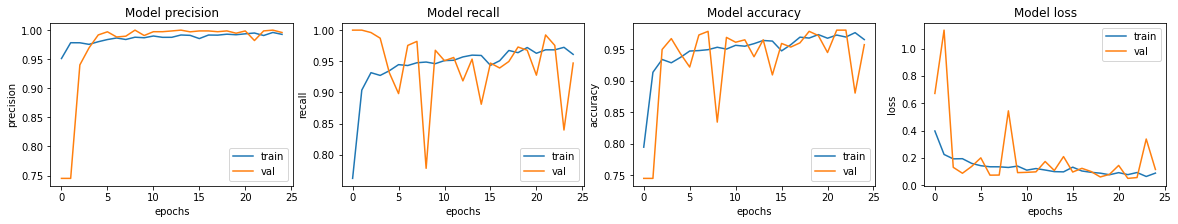

In [102]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')   

Epoch 1/30
261/261 [==============================] - 58s 190ms/step - loss: 0.4018 - accuracy: 0.8015 - precision: 0.9532 - recall: 0.7700 - val_loss: 0.6505 - val_accuracy: 0.7433 - val_precision: 0.7433 - val_recall: 1.0000
Epoch 2/30
261/261 [==============================] - 47s 181ms/step - loss: 0.2280 - accuracy: 0.9102 - precision: 0.9706 - recall: 0.9064 - val_loss: 0.9120 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 3/30
261/261 [==============================] - 48s 186ms/step - loss: 0.1924 - accuracy: 0.9286 - precision: 0.9768 - recall: 0.9256 - val_loss: 0.3651 - val_accuracy: 0.8067 - val_precision: 0.7941 - val_recall: 1.0000
Epoch 4/30
261/261 [==============================] - 49s 189ms/step - loss: 0.1876 - accuracy: 0.9294 - precision: 0.9765 - recall: 0.9271 - val_loss: 0.4823 - val_accuracy: 0.8163 - val_precision: 0.9966 - val_recall: 0.7558
Epoch 5/30
261/261 [==============================] - 50s 190ms/step - loss: 0.1618 - accura

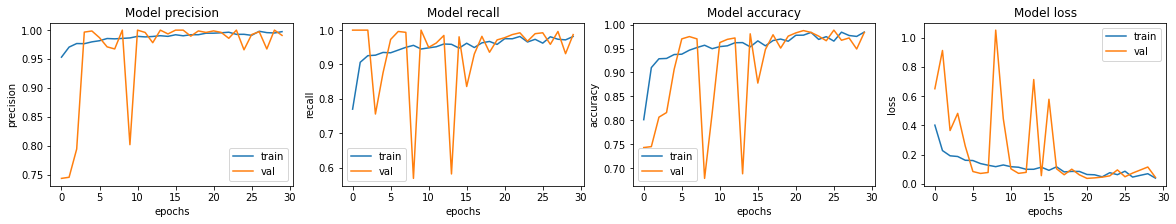

In [103]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )
    
    
# 모델을 fit하자.각 파라미터에 위에서 선언했던 변수, 데이터셋을 가져와서 각각에 맞게 넣어주자
EPOCHS = 30

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        
    )    
    
    
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')       

Epoch 1/50
261/261 [==============================] - 56s 182ms/step - loss: 0.3895 - accuracy: 0.8168 - precision: 0.9467 - recall: 0.7977 - val_loss: 0.7025 - val_accuracy: 0.7471 - val_precision: 0.7471 - val_recall: 1.0000
Epoch 2/50
261/261 [==============================] - 46s 178ms/step - loss: 0.2293 - accuracy: 0.9128 - precision: 0.9710 - recall: 0.9096 - val_loss: 1.4929 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 3/50
261/261 [==============================] - 47s 179ms/step - loss: 0.1925 - accuracy: 0.9260 - precision: 0.9732 - recall: 0.9258 - val_loss: 0.2672 - val_accuracy: 0.8760 - val_precision: 0.8615 - val_recall: 0.9936
Epoch 4/50
261/261 [==============================] - 49s 187ms/step - loss: 0.1571 - accuracy: 0.9442 - precision: 0.9818 - recall: 0.9421 - val_loss: 0.2064 - val_accuracy: 0.9298 - val_precision: 0.9916 - val_recall: 0.9135
Epoch 5/50
261/261 [==============================] - 49s 190ms/step - loss: 0.1753 - accura

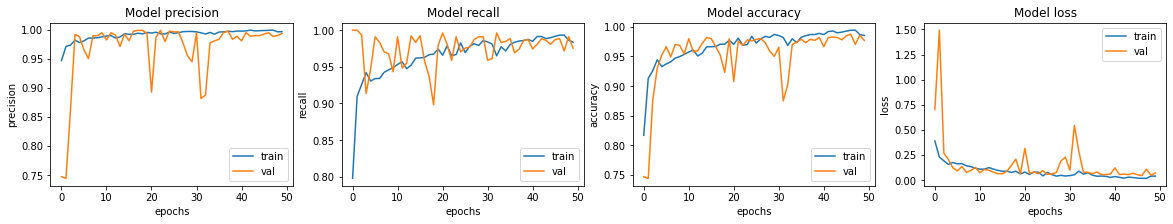

In [104]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )
    
    
# 모델을 fit하자.각 파라미터에 위에서 선언했던 변수, 데이터셋을 가져와서 각각에 맞게 넣어주자
EPOCHS = 50

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        
    )    
    
    
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가를 해보자.

loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')       

# 회고

## 1. 이번 프로젝트에서 어려웠던 점   

- 학습 시간이 오래 걸려서, [E-08]에서 배웠던 Earlystopping을 적용하려고 하였다. 원래는 ['val_loss', 'val_accuracy']처럼 여러 개 요소들을 early stopping 조건으로 넣고 싶었으나, 사용법을 찾지 못하였음.
- 노드에서 제시된 data augmenation 외의 기법들은 어떻게, 그리고 어떤 상황에 적용하는지를 모르겠음

## 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.   

노드 내용만으로는 내용들이 이해가 가지않아서 추가로 찾아보았다.

[참고자료: tf.data API](https://www.tensorflow.org/guide/data_performance)

[참고자료: tf.data.experimental.cardinality](https://www.tensorflow.org/api_docs/python/tf/data/experimental/cardinality)

[참고자료: Earlystopping, Checkpoint](https://itlamp.tistory.com/21)

### 1) Prefetch, Autotune

먼저 이들은 tf.data API를 통해 유연하고 효율적인 입력 파이프라인을 만드는 데 도움이 되기 위한 메서드 중 하나였다. 모델의 최대 성능을 위해서는 현재 단계가 종료되기 전에 다음 스텝의 데이터를 운반하는 효율적인 입력 파이프라인이 필요하기 때문이다. 그리고 이들을 알기 전에, `tf.data.Dataset.interleave` transformation에 대해 알고 넘어가자. data extraction everheads들의 영향을 줄이기 위해서는 `tf.data.Dataset.interleave` transformation을 사용할 수 있다. 이들은 data loading step을 parallelize 해주며, other datasets의 contents들을 interleaving 해준다.

Prefetch는 preprocessing과 model execution을 overlap하여 시간을 아껴준다. model이 training step `s`일때, input pipeline은 step `s+1`의 데이터를 읽어온다. prefetch할 numbers of elements는 number of batches comsumed by a single training step보다 같거나 커야한다. 

이때, 이 값을 수동으로 지정해주거나,`tf.data.AUTOTUNE` 메서드를 이용해서 `tf.data` runtime의 값을 동적으로 바꾸게 해 준다.

>👀 Note that the prefetch transformation provides benefits any time there is an opportunity to overlap the work of a "producer" with the work of a "consumer."


### 2) num_parallel_calls, cycle_legnth

- num_parallel calls: can specify the level of parallelism. 
- cycle_legnth: can specify the number of dataset to overlap

`prefetch`transformation과 비슷하게, `interleave` transformation도 `tf.data.AUTOTUNE`을 지원한다.

### 3) tf.data.experimental.cardinality

Returns the cardinality of `dataset`.

```python
dataset = tf.data.Dataset.range(42)
print(tf.data.experimental.cardinality(dataset).numpy()) # 42
```
### 4) Earlystopping, Checkpoint

1. Earlystopping   
For prevent overfitting. 
- monitor: 무엇을 조기 종료의 조건으로 삼을 것인가. 주로 val_loss, val_acc을 사용함
- mode: {min, max, auto} 중 하나로 넣는다. mode의 값에 따라 어떤 상황에서 training을 종료할지 결정함.
- verbose
- patience: mode parameter에서 지정한 값으로 상태에 도달했을 때 몇 번 더 학습시킬 것인지 정함.
- min_delta: 성능이 향상되었다고 판단할 최소한의 변화량을 정하는 값. 일반적으로 0으로 놓음. min_delta 값을 정하기 위해 소량의 데이터로 훈련시켜보고 추이를 지켜보면서 min_delta 값을 정해준다.
> es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


2. Checkpoint   
학습의 중간 중간에 모델을 저장해주는 기능을 한다. callback package 중 checkpoint 메서드가 그 역할을 한다. 
- filepath: 중간에 학습된 모델을 저장할 파일명을 지정하는 부분
- monitor: earlystopping과 마찬가지로 "무엇을" 기준으로 저장할지 지정함
- verbose
- mode
- save_best_only: monitor 대상이 최고값일 때만 저장한다.(True)
- save_weights_only: 모델의 가중지 값만 저장(True), 모델 전체 저장(False)
- save_freq: 모델 저장 주기를 결정함. 값이 1인 경우 매 학습시마다 저장.

> mc = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)


## 3. 루브릭 평가 지표를 맞추기 위해 시도한 것들   

- data augmenatation과 여러 메서드와 argument값을 공부하였다.
- abalation study: dropout없을 때, batch_normalization 없을 때를 비교하였다.
- earlystopping을 해 보았지만, 오히려 정확도가 낮게 나왔다. checkpoint는 적용을 해서 돌아가게는 됐는데, UTF-8 encoding을 해결하지 못해서 다시 지웠다.

## 4. 자기다짐

- 아침에 더 일찍 일어나는 습관을 들여서 공부를 하자. 9시에 일정이 시작한다고 해서 내 일상이 9시에 시작한다는 고정관념을 버리자. 더 일찍 일어나서 공부량을 늘리고, 밤에 쓸모없는 시간을 줄여야겠다.
- 알람 앱도 괜찮은 걸 사용해서 어떻게든 아침에 일어나게 해보자.
- 기존 공부를 활용을 할 수 있어야 제대로 배운 것이라고 생각한다. hyperparmeter를 찾는 것도 kaggle boston house price 분석을 할 때 배웠지만, 추후에야 그것을 활용하면 됨을 알게 되었다. **생각을 하고 접근하자!!!!**